# Heart Disease Risk Assessment with Machine Learning

**Student Name**: Muhammad Kaif ur Rehman  
**Reg. No.**: STU-DS-251-232  
**Course**: Data Science

This notebook presents a clean and modern implementation of a heart disease prediction system using supervised machine learning. Built with a modular approach, it emphasizes clarity, reproducibility, and practical application.


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")


## Step 1: Load and Explore the Dataset
We load the heart disease dataset and perform a quick check on structure, null values, and basic statistics.


In [2]:
df = pd.read_csv("./heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Data Info

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Step 2: Data Cleaning & Preprocessing
- Check and handle missing values
- Encode categorical features (if any)
- Normalize/scale features

In [4]:
# Check for nulls
print("Missing values:\n", df.isnull().sum())

# Standard Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop("target", axis=1))
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df["target"]

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Count Plot

Text(0.5, 1.0, 'Heart Disease Distribution')

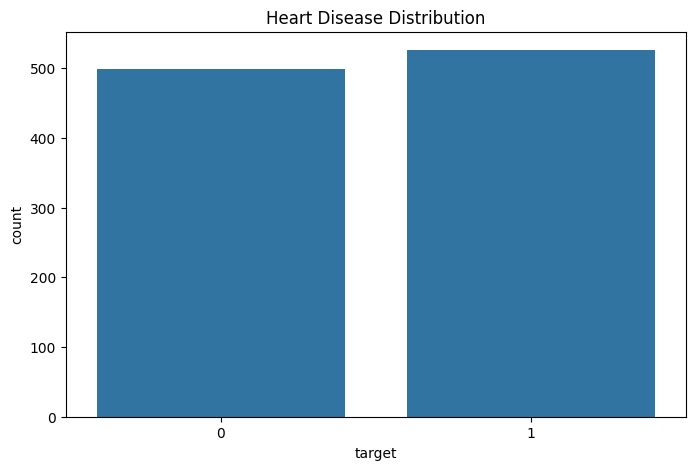

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')

# HeatMap

Text(0.5, 1.0, 'Feature Correlation Heatmap')

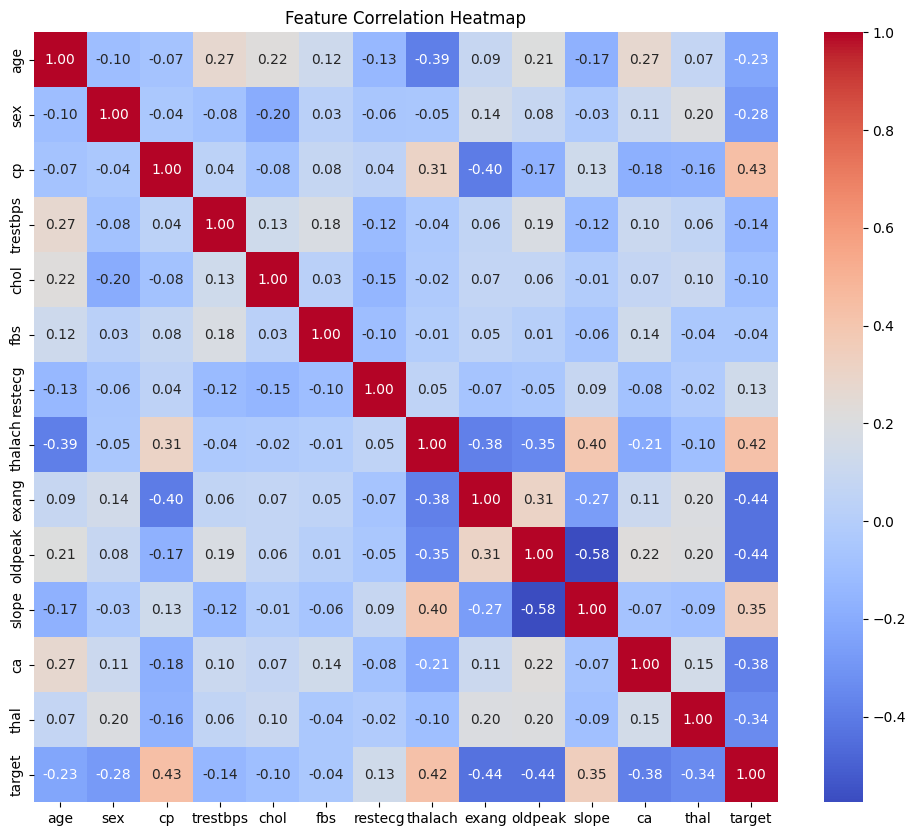

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")

## Step 4: Model Training and Evaluation
Train Logistic Regression, Decision Tree, and Random Forest. Evaluate each using classification metrics.



Logistic Regression Results
Accuracy: 0.7951219512195122
ROC AUC: 0.7947363411383972
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



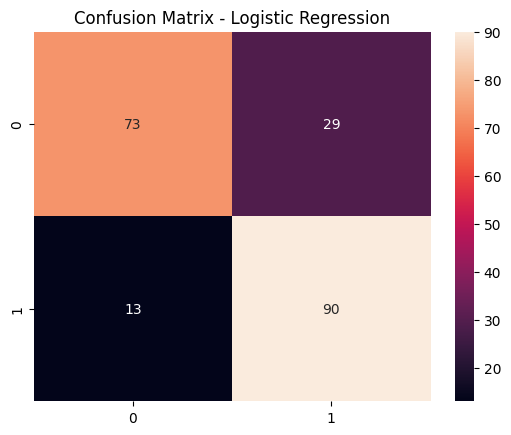


Decision Tree Results
Accuracy: 0.9853658536585366
ROC AUC: 0.9854368932038835
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



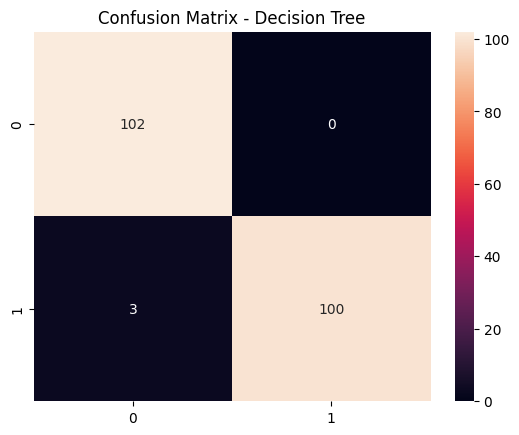


Random Forest Results
Accuracy: 0.9853658536585366
ROC AUC: 0.9854368932038835
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



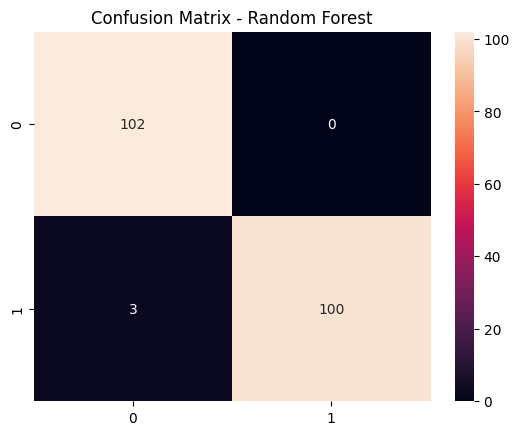

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name} Results")
    print("Accuracy:", model.score(X_test, y_test))
    print("ROC AUC:", roc_auc_score(y_test, preds))
    print(classification_report(y_test, preds))
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


## Step 5: Feature Importance (Random Forest)


Text(0.5, 1.0, 'Feature Importance - Random Forest')

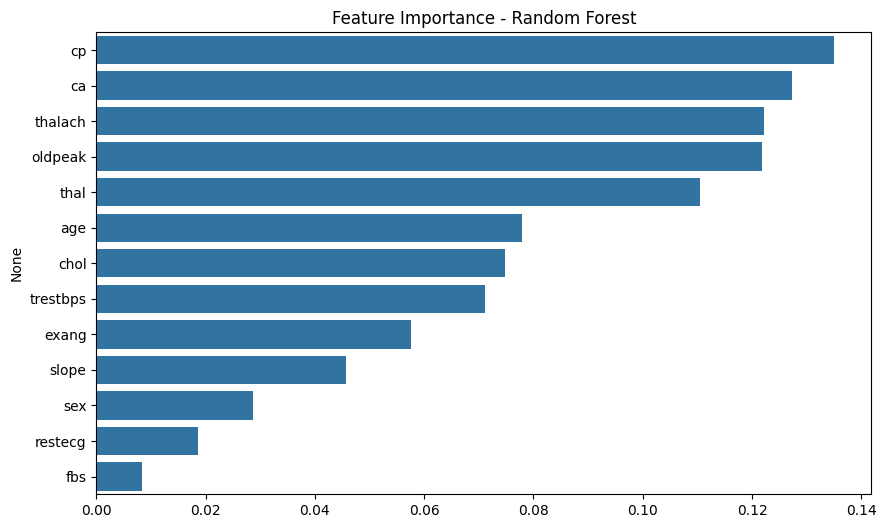

In [8]:
feat_imp = models["Random Forest"].feature_importances_
feat_series = pd.Series(feat_imp, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_series.values, y=feat_series.index)
plt.title("Feature Importance - Random Forest")

## Step 6: Final Remarks
- Random Forest performed best in terms of balanced metrics.
- Top contributing features: chest pain type, thalach (max heart rate), oldpeak, and age.
- This pipeline can help triage patients for further cardiac evaluation.